# Egypt Houses Price

### EDA on Housing Prices Linear Regression
Import Relevant Libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import warnings
import csv
import sys
import os

from collections import defaultdict, Counter

from sklearn.impute import SimpleImputer

%matplotlib inline
plt.rcParams.update({'font.size':12})

sb.set_style('darkgrid')
sb.set_palette('viridis')
sb.set()

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

warnings.filterwarnings('ignore')

In [225]:
df = pd.read_csv("D:\Open Classroom\Datasets\Egypt_Houses_price\Egypt_Houses_Price.csv")
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [189]:
df.shape

(27361, 12)

In [190]:
df.describe(include = 'all')

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
count,27361,27359,27158,27190,26890,27361,27361,27361,27361,27361,27361,27361
unique,11,4182,22,22,1073,3,14,560,4,10,5,183
top,Apartment,3000000,3,2,120.0,No,Unknown,Unknown,Cash or Installment,Ready to move,Finished,New Cairo - El Tagamoa
freq,8506,311,9784,7753,663,16500,10439,11068,10842,12142,14375,6789


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Type            27361 non-null  object
 1   Price           27359 non-null  object
 2   Bedrooms        27158 non-null  object
 3   Bathrooms       27190 non-null  object
 4   Area            26890 non-null  object
 5   Furnished       27361 non-null  object
 6   Level           27361 non-null  object
 7   Compound        27361 non-null  object
 8   Payment_Option  27361 non-null  object
 9   Delivery_Date   27361 non-null  object
 10  Delivery_Term   27361 non-null  object
 11  City            27361 non-null  object
dtypes: object(12)
memory usage: 2.5+ MB


In [192]:
df[df == 'Unknown'].sum()

Payment_Option    0
Delivery_Term     0
City              0
dtype: int64

In [193]:
df.isnull().sum()

Type                0
Price               2
Bedrooms          203
Bathrooms         171
Area              471
Furnished           0
Level               0
Compound            0
Payment_Option      0
Delivery_Date       0
Delivery_Term       0
City                0
dtype: int64

In [194]:
df['Price'].replace('Unknown', 0, inplace = True)
df['Bedrooms'].replace('Unknown', 0, inplace = True)
df['Bathrooms'].replace('Unknown', 0, inplace = True)
df['Area'].replace('Unknown', 0, inplace = True)


df['Bedrooms'].replace('10+', 10, inplace = True)
df['Bathrooms'].replace('10+', 10, inplace = True)

In [195]:
df['Price'] = pd.to_numeric(df['Price'])
df['Bedrooms'] = pd.to_numeric(df['Bedrooms'])
df['Bathrooms'] = pd.to_numeric(df['Bathrooms'])
df['Area'] = pd.to_numeric(df['Area'])

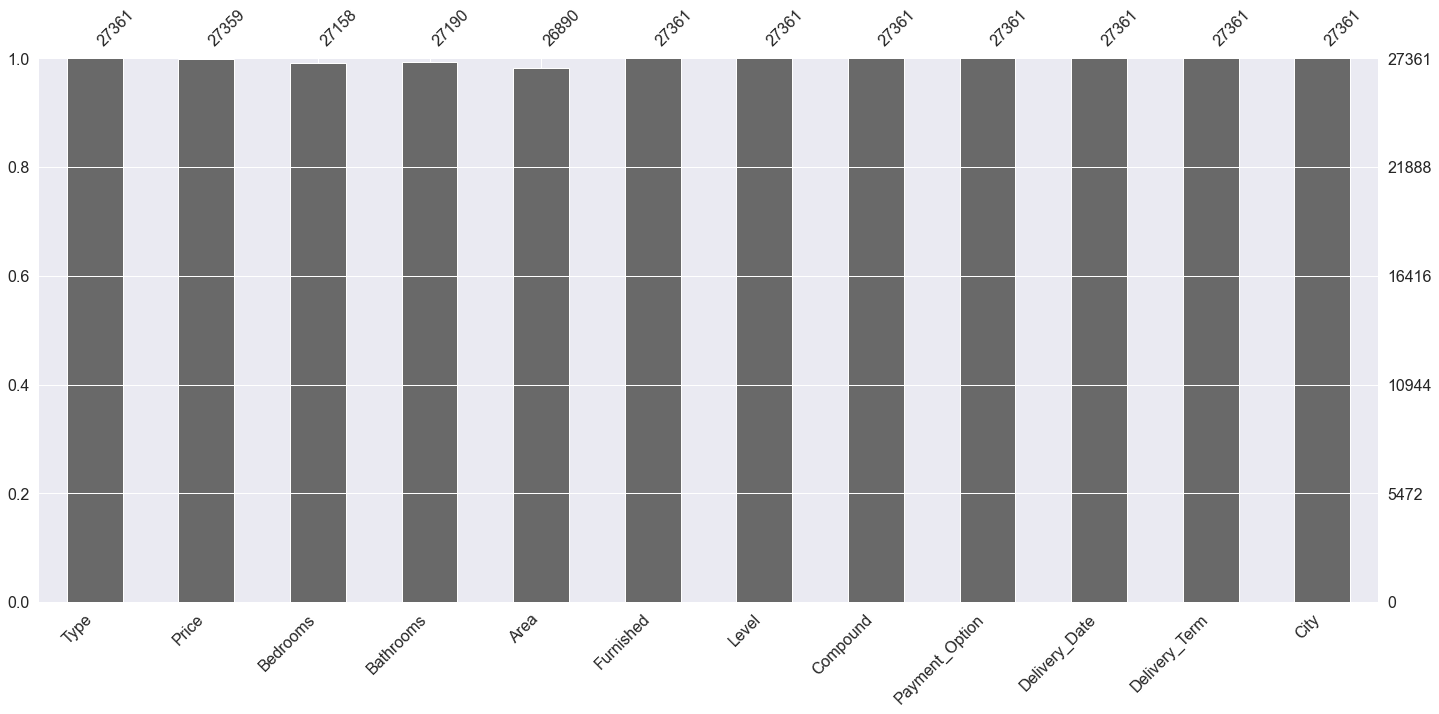

In [196]:
msno.bar(df)

In [197]:
round(df.describe())

,Price,Bedrooms,Bathrooms,Area
count,27359.0,27158.0,27190.0,26890.0
mean,4755383.0,3.0,3.0,229.0
std,6764340.0,1.0,1.0,161.0
min,0.0,0.0,0.0,0.0
25%,1129000.0,3.0,2.0,125.0
50%,2722000.0,3.0,3.0,175.0
75%,5950000.0,4.0,3.0,275.0
max,240000000.0,10.0,10.0,998.0


In [198]:
si = SimpleImputer(missing_values=np.nan, strategy='mean')

df[['Price', 'Bedrooms', 'Bathrooms', 'Area']] = si.fit_transform(df[['Price', 'Bedrooms', 'Bathrooms', 'Area']])#.fillna('missing')

In [199]:
round(df.describe())

,Price,Bedrooms,Bathrooms,Area
count,27361.0,27361.0,27361.0,27361.0
mean,4755383.0,3.0,3.0,229.0
std,6764092.0,1.0,1.0,160.0
min,0.0,0.0,0.0,0.0
25%,1130000.0,3.0,2.0,125.0
50%,2723000.0,3.0,3.0,178.0
75%,5950000.0,4.0,3.0,270.0
max,240000000.0,10.0,10.0,998.0


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27361 entries, 0 to 27360
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Type            27361 non-null  object 
 1   Price           27361 non-null  float64
 2   Bedrooms        27361 non-null  float64
 3   Bathrooms       27361 non-null  float64
 4   Area            27361 non-null  float64
 5   Furnished       27361 non-null  object 
 6   Level           27361 non-null  object 
 7   Compound        27361 non-null  object 
 8   Payment_Option  27361 non-null  object 
 9   Delivery_Date   27361 non-null  object 
 10  Delivery_Term   27361 non-null  object 
 11  City            27361 non-null  object 
dtypes: float64(4), object(8)
memory usage: 2.5+ MB


Text(0.5, 1.0, 'Pearsons Correlation of columns')

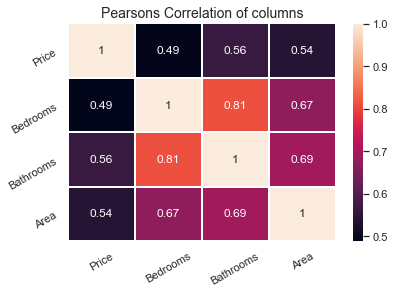

In [201]:
plt.figure(figsize = (6, 4))
sb.heatmap(df.corr(), annot = True, linewidths=0.9)
plt.yticks(rotation = 30)
plt.xticks(rotation = 30)
plt.title('Pearsons Correlation of columns', fontdict = {'size':14})

In [202]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City
0,Duplex,4000000.0,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City
1,Apartment,4000000.0,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar
2,Apartment,2250000.0,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha
3,Apartment,1900000.0,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City
4,Apartment,5800000.0,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa


In [203]:
df['Type'] = df['Type'].apply(lambda x: x.lower())

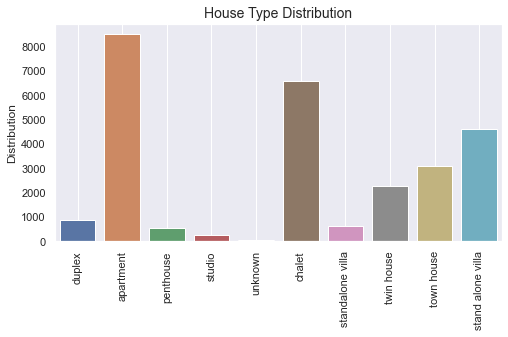

In [204]:
plt.figure(figsize = (8, 4))
sb.countplot(df['Type'])
plt.title('House Type Distribution', fontdict = {'size':14})
plt.xticks(rotation = 90)
plt.xlabel(None)
plt.ylabel('Distribution')
plt.grid()

Text(0.5, 1.0, 'Delivery Terms')

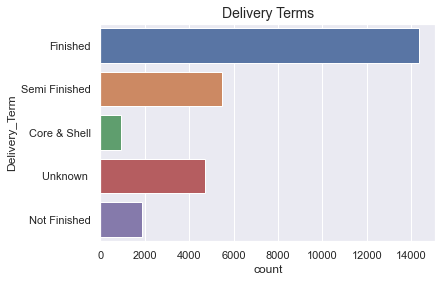

In [205]:
sb.countplot(y = df['Delivery_Term'])
plt.title('Delivery Terms', fontdict = {'size':14})

Text(0.5, 1.0, 'Payment Mode')

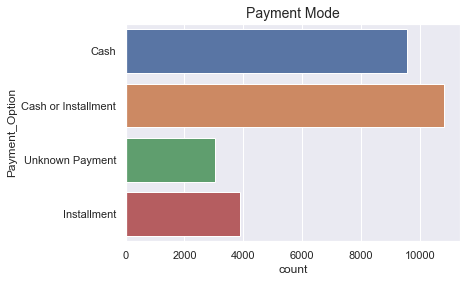

In [206]:
sb.countplot(y = df['Payment_Option'])
plt.title('Payment Mode', fontdict = {'size':14})

Text(0.5, 1.0, 'City Popularity on Dataset')

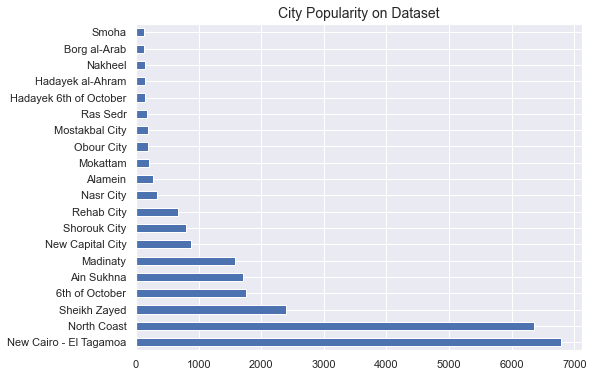

In [207]:
plt.figure(figsize = (8, 6))
df['City'].value_counts().head(20).plot(kind = 'barh')
plt.title('City Popularity on Dataset', fontdict = {'size': 14})

In [227]:
df['City'].replace('6th of October', 'New Cairo - El Tagamoa')
df['City'].replace('10th of Ramadan', 'North Coast')
df['City'].replace('Only in Apartment & Duplex for sale', 'Ain Sukhna')
df['City'].replace('15 May City', 'Sheikh Zayed')
df['City'].replace('Only in Vacation Homes for Sale', 'Madinaty')
df['City'].replace('Only in Villas for sale', 'New Capital City')
df['City'].replace('Ramses + Ramses Extension', 'Ramses')
df['City'].replace('(view phone number)', 'Shorouk City')

0                     Nasr City
1                   Camp Caesar
2                         Smoha
3                     Nasr City
4        New Cairo - El Tagamoa
                  ...          
27356               North Coast
27357    New Cairo - El Tagamoa
27358    New Cairo - El Tagamoa
27359                  Mokattam
27360              Sheikh Zayed
Name: City, Length: 27361, dtype: object

In [209]:
from geopy import geocoders

In [233]:
# Import the required library
from geopy.geocoders import Nominatim

# Initialize Nominatim API
geolocator = Nominatim(user_agent='EHP')

locs = [i for i in df['City']]

for i in locs:
    location = geolocator.geocode(i[2])

    df['lat'] = location.latitude
    df['long'] = location.longitude
    # print("The latitude of the location is: ", location.latitude)
    # print("The longitude of the location is: ", location.longitude)
    

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=a&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [232]:
df.head()

,Type,Price,Bedrooms,Bathrooms,Area,Furnished,Level,Compound,Payment_Option,Delivery_Date,Delivery_Term,City,lat,long
0,Duplex,4000000,3.0,3.0,400.0,No,7,Unknown,Cash,Ready to move,Finished,Nasr City,47.798135,13.046481
1,Apartment,4000000,3.0,3.0,160.0,No,10+,Unknown,Cash,Ready to move,Finished,Camp Caesar,47.798135,13.046481
2,Apartment,2250000,3.0,2.0,165.0,No,1,Unknown,Cash,Ready to move,Finished,Smoha,47.798135,13.046481
3,Apartment,1900000,3.0,2.0,230.0,No,10,Unknown,Cash,Ready to move,Finished,Nasr City,47.798135,13.046481
4,Apartment,5800000,2.0,3.0,160.0,No,Ground,Eastown,Cash,Ready to move,Semi Finished,New Cairo - El Tagamoa,47.798135,13.046481


In [228]:
df['City'].unique()

array(['Nasr City', 'Camp Caesar', 'Smoha', 'New Cairo - El Tagamoa',
       'Sheikh Zayed', 'Shorouk City', 'Sidi Beshr', 'Gesr Al Suez',
       'Mokattam', 'New Capital City', 'New Damietta', 'Zahraa Al Maadi',
       '6th of October', 'Mansura', 'New Heliopolis',
       'Kafr al-Sheikh City', 'Badr City', 'Sporting', 'Imbaba', 'Gamasa',
       'Borg al-Arab', 'Mohandessin', 'Glim', 'Ain Sukhna', 'Abasiya',
       'Fleming', 'Maadi', 'Hadayek 6th of October', 'Madinaty', 'Haram',
       'Damietta City', 'Ismailia City', '10th of Ramadan', 'Heliopolis',
       'Rehab City', 'Dar al-Salaam', 'Hadayek al-Ahram', 'North Coast',
       'Nakheel', 'Bacchus', 'Obour City', 'Hurghada', 'Agouza', 'Tanta',
       'Tura', 'Faisal District', 'Mandara', 'Helmeyat El Zaytoun',
       'Katameya', 'Only in Apartments & Duplex for Sale', 'Alamein',
       'Qasr al-Nil', 'Miami', 'Hadayek al-Kobba', 'Tersa',
       'Mostakbal City', 'Agami', 'Ras al-Bar', 'Port Fouad',
       'Salam City', 'Aswan City

In [224]:
df['City'].value_counts()

Series([], Name: City, dtype: int64)

In [234]:
#[i for i in df['City']]